In [1]:
!pip install scipy

In [2]:
!pip install researchpy

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

import researchpy as rp
from scipy import stats

https://www.kaggle.com/lakshmi25npathi/bike-sharing-dataset

In [2]:
bike_sharing_data = pd.read_csv('datasets/day.csv')

bike_sharing_data.shape

(731, 16)

In [3]:
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
bike_sharing_data = bike_sharing_data[['season', 
                                       'mnth', 
                                       'holiday', 
                                       'workingday', 
                                       'weathersit', 
                                       'temp',
                                       'cnt']]

In [5]:
bike_sharing_data.to_csv('datasets/bike_sharing_data_processed.csv', index=False)

In [6]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [7]:
bike_sharing_data['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [8]:
bike_sharing_data['workingday'].unique()

array([0, 1], dtype=int64)

In [9]:
bike_sharing_data['holiday'].unique()

array([0, 1], dtype=int64)

In [10]:
bike_sharing_data['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [11]:
bike_sharing_data['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [12]:
bike_sharing_data.shape

(731, 7)

In [13]:
bike_sharing_data.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


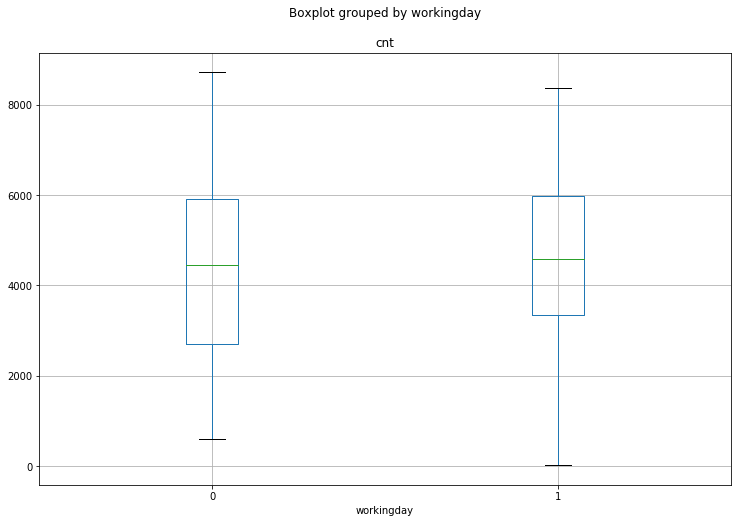

In [14]:
bike_sharing_data.boxplot(column=['cnt'], by='workingday', figsize=(12, 8))

In [15]:
sample_01 = bike_sharing_data[(bike_sharing_data['workingday'] == 1)]

sample_02 = bike_sharing_data[(bike_sharing_data['workingday'] == 0)]

In [16]:
sample_01.shape, sample_02.shape

((500, 7), (231, 7))

In [17]:
sample_01 = sample_01.sample(231)

sample_01.shape, sample_02.shape

((231, 7), (231, 7))

## The hypothesis being tested

* __Null hypothesis (H0): u1 = u2, which translates to the mean of `sample_01` is equal to the mean of `sample 02`__
* __Alternative hypothesis (H1): u1 ? u2, which translates to the means of `sample01` is not equal to `sample 02`__

### Independent t-test by using `scipy.stats`

In [18]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

Ttest_indResult(statistic=1.3870055702980575, pvalue=0.16611175620298071)

### Independent t-test using `researchpy`

https://researchpy.readthedocs.io/en/latest/ttest_documentation.html

In [19]:
descriptives, results = rp.ttest(sample_01['cnt'], sample_02['cnt'])

In [20]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,231.0,4578.627706,1789.193795,117.720309,4346.679640,4810.575771
1,cnt,231.0,4330.168831,2052.141245,135.020981,4064.132702,4596.204960
2,combined,462.0,4454.398268,1927.090010,89.656341,4278.212511,4630.584026


In [30]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


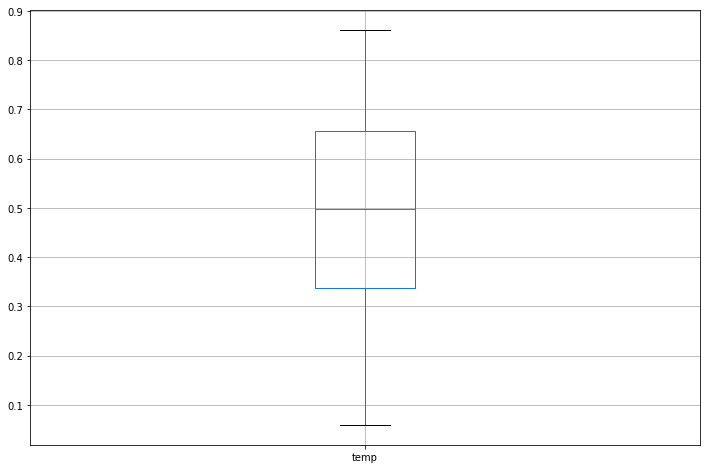

In [22]:
bike_sharing_data[['temp']].boxplot(figsize=(12, 8))

In [32]:
bike_sharing_data['temp_category'] = \
    bike_sharing_data['temp'] > bike_sharing_data['temp'].mean()

In [33]:
bike_sharing_data.sample(10)

,season,mnth,holiday,workingday,weathersit,temp,cnt,temp_category
372,1,1,0,0,1,0.337500,3425,False
227,3,8,0,1,1,0.700833,4725,True
209,3,7,0,1,1,0.838333,3846,True
589,3,8,0,0,1,0.700833,6544,True
585,3,8,0,1,2,0.750000,7534,True
233,3,8,0,1,1,0.691667,4758,True
148,2,5,0,0,1,0.667500,4788,True
13,1,1,0,1,1,0.160870,1421,False
627,3,9,0,1,1,0.552500,7591,True
134,2,5,0,0,2,0.562500,4553,True


In [34]:
bike_sharing_data.groupby('temp_category')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
temp_category,,,,,,,,
False,364.0,3387.664835,1691.340133,22.0,1964.5,3301.0,4513.5,8090.0
True,367.0,5611.904632,1475.698228,1115.0,4548.5,5336.0,6897.5,8714.0


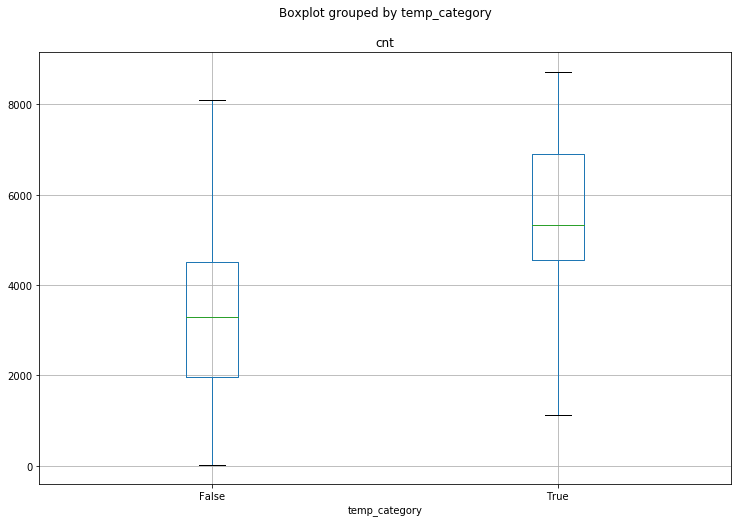

In [35]:
bike_sharing_data.boxplot(column=['cnt'], by='temp_category', figsize=(12, 8))

In [36]:
sample_01 = bike_sharing_data[(bike_sharing_data['temp_category'] == True)]

sample_02 = bike_sharing_data[(bike_sharing_data['temp_category'] == False)]

In [37]:
sample_01.shape, sample_02.shape

((367, 8), (364, 8))

In [38]:
sample_01 = sample_01.sample(364)

sample_01.shape, sample_02.shape

((364, 8), (364, 8))

In [42]:
stats.shapiro(diff)

(0.9903984665870667, 0.017733793705701828)

In [43]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

Ttest_indResult(statistic=18.83463484528047, pvalue=9.788048057828264e-65)

In [44]:
descriptives, results = rp.ttest(sample_01['cnt'], sample_02['cnt'], equal_variances=False)

In [45]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,364.0,5603.596154,1475.753658,77.350509,5451.484781,5755.707527
1,cnt,364.0,3387.664835,1691.340133,88.650311,3213.332169,3561.997501
2,combined,728.0,4495.630495,1935.213520,71.723785,4354.820034,4636.440955
